In [1]:
import matplotlib.pyplot as plt #importing libraries
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
df = pd.read_csv(url) # reading data into pandas dataframe
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']] #defining X
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


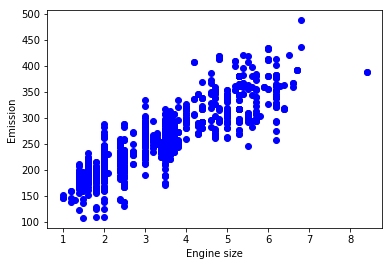

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue') #visualizing our X
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split #splitting data for training & testing
X = np.asanyarray(cdf[['ENGINESIZE']])
Y = np.asanyarray(cdf[['CO2EMISSIONS']])
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=40)

In [38]:
from sklearn.preprocessing import PolynomialFeatures #fitting in polynomial of degree 4, you can choose any degree of your choice, just make sure you don't underfit or overfit.
from sklearn import linear_model
poly = PolynomialFeatures(degree=4)
xtrain_poly = poly.fit_transform(xtrain)
xtrain_poly

array([[  1.    ,   2.5   ,   6.25  ,  15.625 ,  39.0625],
       [  1.    ,   1.8   ,   3.24  ,   5.832 ,  10.4976],
       [  1.    ,   3.    ,   9.    ,  27.    ,  81.    ],
       ...,
       [  1.    ,   3.6   ,  12.96  ,  46.656 , 167.9616],
       [  1.    ,   3.7   ,  13.69  ,  50.653 , 187.4161],
       [  1.    ,   5.3   ,  28.09  , 148.877 , 789.0481]])

In [39]:
clf = linear_model.LinearRegression() #fitting data & displaying intercepts & coefficients
train_y_ = clf.fit(xtrain_poly, ytrain)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         53.04379048 -5.9657676   1.26343744 -0.09921543]]
Intercept:  [110.98440118]


Text(0,0.5,'Emission')

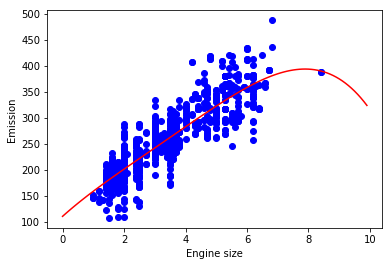

In [40]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue') # visualizing results
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2) + clf.coef_[0][3]*np.power(XX, 3) + clf.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [42]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(xtest)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - ytest)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - ytest) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , ytest) )

Mean absolute error: 27.18
Residual sum of squares (MSE): 1228.76
R2-score: 0.62
